# Predicting User Ratings Of Mobile Games

Author: Christine Li 


## Background 
The mobile phone games industry has become increasingly popular over the years with the introduction of smart phones. While 'classic' gamers still own powerful computers or consoles for their gaming needs, smart phones and their gaming ability have become powerful in their own right. As technology has advanced, each of these platforms have turned into major sources of profits for companies. Whether it be on public transport, waiting for family and friends at meet-up locations or just taking the time at the end of the day to unwind, these platforms offer unlimited opportunies for people to escape into games.

One of the primary factors is accessibility of the smart phone. With the rapid evolution of the smartphone, mobile gaming's popularity is propelled by the smartphone's widespread availability, convenience and portability. This allows gamers to play almost virtually anywhere. Mobile games are also easy to download and can be played on the go without investing into any special equipment making it a valuable source of entertainment. 
 
User reviews are just one factor among many that affect gaming sales. Game developers can leverage positive reviews to increase excitement and attract players. Game ratings can play a pivotal role in purchasing the game and gamers may have varying thresholds for ratings which affect their buying. 


## Business Problem - Predicting User Ratings of Mobile Strategy Games 
Objective: To create a predictive multiple regression model to predict the user rating of a mobile strategy game.

Using this tool, game developers can create a mobile strategy game that capitalises on features that lead to increased user ratings. Mobile game ratings are a crucial metric for developers and companies to gauge the success of their games and overall revenue generation.

## Data 
The mobile gaming industry is incredibly large, so we will be focussing on a subset of mobile games classified as mobile strategy games. 

This dataset, '17K Mobile Strategy Games' was downloaded from Kaggle. This can be accessed with the URL https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games?resource=download
The data was collected by the owner of the dataset by mostly using the iTunes API, App Store sitemap, along with some web scraping on 3rd of August 2019.


Column Names and Descriptions:
* *URL* - The URL for the mobile game
* *ID* - The assigned ID for the game
* *Name* - The name of the game
* *Subtitle* - The secondary text under the name.
* *Icon URL* - The URL for the game icon 
* *Average User Rating* - Rounded to nearest 0.5, requires at least 5 ratings. 
* *User Rating Count* - Number of ratings internationally, null means it is below 5
* *Price* - Price in USD
* *In-app Purchases* - Prices of available in-app purchases
* *Description* - Mobile Game App description 
* *Developer* - App developer
* *Age Rating* - Either 4+, 9+, 12+ or 17+
* *Languages* - Language codes using ISO Language Codes
* *Size* - Size of the app in bytes
* *Primary Genre* - The main genre of the app
* *Genres* - Genres of the app 
* *Original Release Date* - When it was released
* *Current Version Release Date* - When it was last updated

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
games = pd.read_csv('/Users/christineli/Desktop/Capstone Project/appstore_games.csv')
games.head()

URL         ID  \
0   https://apps.apple.com/us/app/sudoku/id284921427  284921427   
1  https://apps.apple.com/us/app/reversi/id284926400  284926400   
2  https://apps.apple.com/us/app/morocco/id284946595  284946595   
3  https://apps.apple.com/us/app/sudoku-free/id28...  285755462   
4  https://apps.apple.com/us/app/senet-deluxe/id2...  285831220   

            Name Subtitle                                           Icon URL  \
0         Sudoku      NaN  https://is2-ssl.mzstatic.com/image/thumb/Purpl...   
1        Reversi      NaN  https://is4-ssl.mzstatic.com/image/thumb/Purpl...   
2        Morocco      NaN  https://is5-ssl.mzstatic.com/image/thumb/Purpl...   
3  Sudoku (Free)      NaN  https://is3-ssl.mzstatic.com/image/thumb/Purpl...   
4   Senet Deluxe      NaN  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   

   Average User Rating  User Rating Count  Price In-app Purchases  \
0                  4.0             3553.0   2.99              NaN   
1                  3.5              284.0   1.99              NaN   
2                  3.0             8376.0   0.00              NaN   
3                  3.5           190394.0   0.00              NaN   
4                  3.5               28.0   2.99              NaN   

                                         Description  \
0  Join over 21,000,000 of our fans and download ...   
1  The classic game of Reversi, also known as Oth...   
2  Play the classic strategy game Othello (also k...   
3  Top 100 free app for over a year.\nRated "Best...   
4  "Senet Deluxe - The Ancient Game of Life and A...   

                  Developer Age Rating  \
0  Mighty Mighty Good Games         4+   
1          Kiss The Machine         4+   
2               Bayou Games         4+   
3  Mighty Mighty Good Games         4+   
4           RoGame Software         4+   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres Original Release Date  \
0         Games            Games, Strategy, Puzzle            11/07/2008   
1         Games             Games, Strategy, Board            11/07/2008   
2         Games             Games, Board, Strategy            11/07/2008   
3         Games            Games, Strategy, Puzzle            23/07/2008   
4         Games  Games, Strategy, Board, Education            18/07/2008   

  Current Version Release Date  
0                   30/05/2017  
1                   17/05/2018  
2                    5/09/2017  
3                   30/05/2017  
4                   22/07/2018

In [3]:
games.describe()

ID  Average User Rating  User Rating Count         Price  \
count  1.700700e+04          7561.000000       7.561000e+03  16983.000000   
mean   1.059614e+09             4.060905       3.306531e+03      0.813419   
std    2.999676e+08             0.751428       4.232256e+04      7.835732   
min    2.849214e+08             1.000000       5.000000e+00      0.000000   
25%    8.996543e+08             3.500000       1.200000e+01      0.000000   
50%    1.112286e+09             4.500000       4.600000e+01      0.000000   
75%    1.286983e+09             4.500000       3.090000e+02      0.000000   
max    1.475077e+09             5.000000       3.032734e+06    179.990000   

               Size  
count  1.700600e+04  
mean   1.157064e+08  
std    2.036477e+08  
min    5.132800e+04  
25%    2.295014e+07  
50%    5.676895e+07  
75%    1.330271e+08  
max    4.005591e+09

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

We can see that this is a large dataset with more than 17000 entries and 18 columns. 

At first glance, we can see that majority of this data is an object type which first needs to be transformed before it is able to be used in a multiple regression model. 

We can also see that there are some features of this dataset which won't be relevent for this project which will be dealt with in our Scrub section below. 

## Scrub:
Data preparation
* Deal with missing values
* Deal with outliers
* Fix data values, data types
* Clean data 

Our target variable is the average **user rating** and the other features in our dataset will be the predictors.

In [5]:
#Convert object types columns 'In-app Purchases', 'Age Rating', into numeric data types
games["In-app Purchases"] = pd.to_numeric(games["In-app Purchases"], errors = 'coerce')

#Remove the + from 4+, 9+, 7+, 12+ etc in Age Rating Column to convert into float
games["Age Rating"] = [float(str(i).replace("+", "")) for i in games["Age Rating"]]
games['Age Rating'].value_counts()

4.0     11806
9.0      2481
12.0     2055
17.0      665
Name: Age Rating, dtype: int64

In [6]:
#Confirming that 'In-app Purchases' and 'Age Rating' are now numeric types.
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              2498 non-null   float64
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  float64
 12  Languages                     16947 non-null  object 
 13  S

In [7]:
#Extract year from 'Original Release Date' and 'Current Version Release Date'
games['Original Release Date'] = pd.to_datetime(games['Original Release Date'])
games['Current Version Release Date'] = pd.to_datetime(games['Current Version Release Date'])

games['Original Year'] = games['Original Release Date'].dt.year
games['Current Version Year'] = games['Current Version Release Date'].dt.year


In [8]:
#Drop unnecessary columns and repeated Original Release Date and Current Version Release Date columns
games_clean = games.drop(columns = ['Name','URL', 'ID', 'Subtitle', 'Icon URL', 'Description', 'Original Release Date', 'Current Version Release Date'])

games_clean.head()

Average User Rating  User Rating Count  Price  In-app Purchases  \
0                  4.0             3553.0   2.99               NaN   
1                  3.5              284.0   1.99               NaN   
2                  3.0             8376.0   0.00               NaN   
3                  3.5           190394.0   0.00               NaN   
4                  3.5               28.0   2.99               NaN   

                  Developer  Age Rating  \
0  Mighty Mighty Good Games         4.0   
1          Kiss The Machine         4.0   
2               Bayou Games         4.0   
3  Mighty Mighty Good Games         4.0   
4           RoGame Software         4.0   

                                           Languages        Size  \
0  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  15853568.0   
1                                                 EN  12328960.0   
2                                                 EN    674816.0   
3  DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...  21552128.0   
4  DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...  34689024.0   

  Primary Genre                             Genres  Original Year  \
0         Games            Games, Strategy, Puzzle           2008   
1         Games             Games, Strategy, Board           2008   
2         Games             Games, Board, Strategy           2008   
3         Games            Games, Strategy, Puzzle           2008   
4         Games  Games, Strategy, Board, Education           2008   

   Current Version Year  
0                  2017  
1                  2018  
2                  2017  
3                  2017  
4                  2018

In [9]:
#Check for missing values
games_clean.isna().sum()

#There are missing values in the Average User Rating, User Rating Count, In-app Purchases,
#Languages and Size columns

Average User Rating      9446
User Rating Count        9446
Price                      24
In-app Purchases        14509
Developer                   0
Age Rating                  0
Languages                  60
Size                        1
Primary Genre               0
Genres                      0
Original Year               0
Current Version Year        0
dtype: int64

In [10]:
#In-app purchases: For no in-app purchases, rather leaving it empty replace it with 0.
games_clean['In-app Purchases'].fillna(0, inplace = True)

#Languages: Replace it with english, 'EN', rather than leaving it missing as English
# is one of the most global and spoken languages
games_clean['Languages'].fillna('EN', inplace = True)

#Price: Replace missing values with mean value since only small number missing
games_clean['Price'].fillna(np.mean(games_clean['Price']), inplace = True)

#Convert Size into Megabytes and replace missing value with mean value
games_clean['Size'] = round(games['Size']/1000000, 2)
games_clean['Size'].fillna(np.mean(games_clean['Size']), inplace=True)

#Average User Rating and User Rating Count: Replace with mean value as they are important columns
games_clean['Average User Rating'].fillna(np.mean(games_clean['Average User Rating']), inplace = True)
games_clean['User Rating Count'].fillna(np.mean(games_clean['User Rating Count']), inplace = True)

#Double check all missing values are dealt with
games_clean.isna().sum()

Average User Rating     0
User Rating Count       0
Price                   0
In-app Purchases        0
Developer               0
Age Rating              0
Languages               0
Size                    0
Primary Genre           0
Genres                  0
Original Year           0
Current Version Year    0
dtype: int64

In [11]:
#Fix Languages
games_clean['Languages'] = games['Languages'].apply(lambda x: len(str(x).split(',')))


In [12]:
#Fix genres

Primary_Genre = []
Secondary_Genre = []
for x in games['Genres']:
    Primary_Genre.append(x.split(',')[0])
    Secondary_Genre.append(x.split(',')[1])
    
games_clean['Primary Genre'] = Primary_Genre
games_clean['Genres'] = Secondary_Genre

games_clean.rename(columns = {'Genres':'Secondary Genre'}, inplace = True)

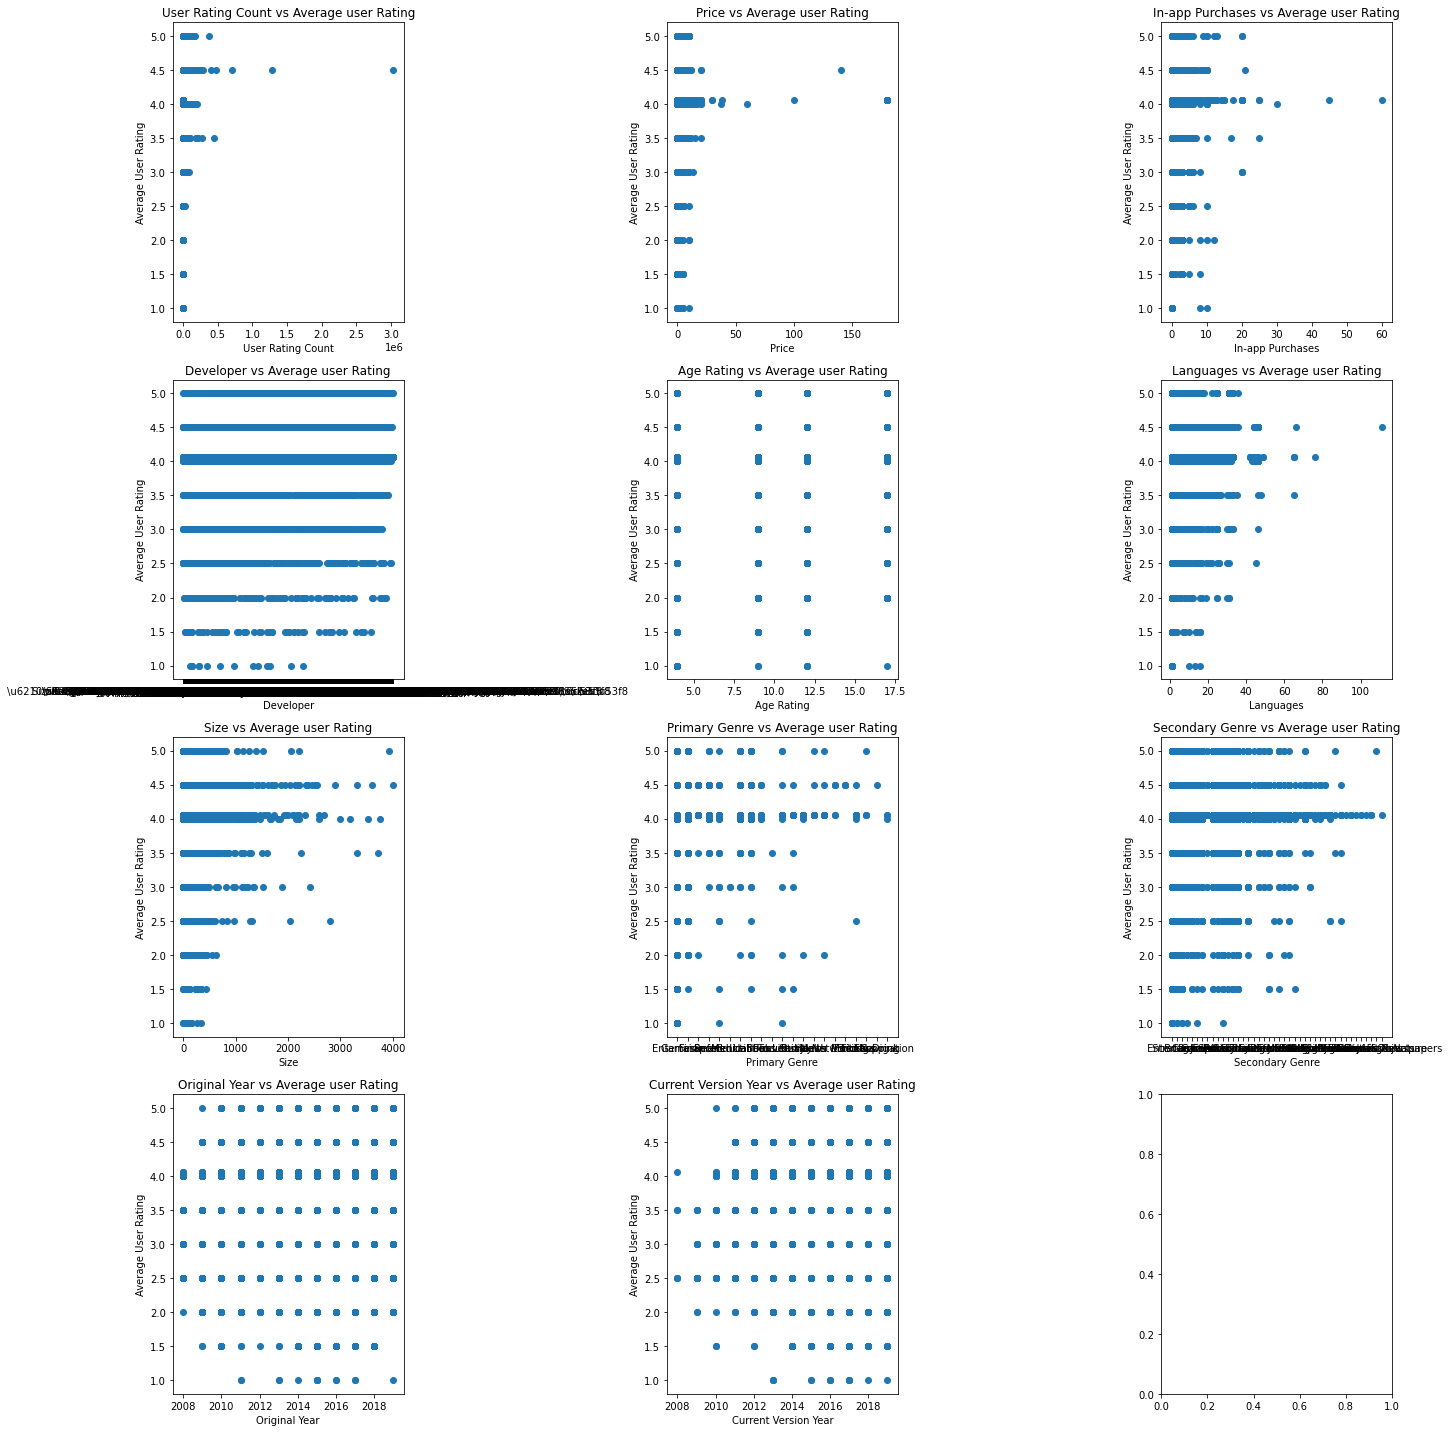

In [13]:
#Identify outliers
#Visualise relationship between features and the response variable using scatter plots

features = games_clean.drop(columns = ['Average User Rating'])

columns_to_plot = features

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for index, column in enumerate(columns_to_plot):
    ax = axes[index]
    ax.scatter(columns_to_plot[column], games_clean['Average User Rating'])
    ax.set_title(f'{column} vs Average user Rating')
    ax.set_xlabel(column)
    ax.set_ylabel('Average User Rating')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show() 

We can also see that there are some outliers in these scatterplots.
<br> Outliers: User Rating Count, Price, In-App Purchases, Languages

In [14]:
#Deal with the outliers in 'User Rating Count'
z_user_count = np.abs(stats.zscore(games_clean['User Rating Count']))

threshold = 3
outliers_user_count = games_clean[z_user_count>threshold]
print('Outliers:', len(outliers_user_count)) #There are 53 outliers in User Rating Count

games_clean1 = games_clean.drop(outliers_user_count.index, axis =0)
games_clean1.info()

Outliers: 53
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16954 entries, 0 to 17006
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average User Rating   16954 non-null  float64
 1   User Rating Count     16954 non-null  float64
 2   Price                 16954 non-null  float64
 3   In-app Purchases      16954 non-null  float64
 4   Developer             16954 non-null  object 
 5   Age Rating            16954 non-null  float64
 6   Languages             16954 non-null  int64  
 7   Size                  16954 non-null  float64
 8   Primary Genre         16954 non-null  object 
 9   Secondary Genre       16954 non-null  object 
 10  Original Year         16954 non-null  int64  
 11  Current Version Year  16954 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.7+ MB


In [15]:
#Deal with outliers in Price

z_price = np.abs(stats.zscore(games_clean1['Price']))
#threshold is 3 as indicated above
outliers_price = games_clean1[z_price>threshold]
print('Outliers:', len(outliers_price)) #There are 37 outliers in User Rating Count

games_clean2 = games_clean1.drop(outliers_price.index, axis =0)
games_clean2.info()

Outliers: 37
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16917 entries, 0 to 17006
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average User Rating   16917 non-null  float64
 1   User Rating Count     16917 non-null  float64
 2   Price                 16917 non-null  float64
 3   In-app Purchases      16917 non-null  float64
 4   Developer             16917 non-null  object 
 5   Age Rating            16917 non-null  float64
 6   Languages             16917 non-null  int64  
 7   Size                  16917 non-null  float64
 8   Primary Genre         16917 non-null  object 
 9   Secondary Genre       16917 non-null  object 
 10  Original Year         16917 non-null  int64  
 11  Current Version Year  16917 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.7+ MB


In [16]:
#Deal with outliers in In-App Purchases

z_in_app_purchases = np.abs(stats.zscore(games_clean2['In-app Purchases']))
#threshold is 3 as indicated above
outliers_in_app_purchases = games_clean2[z_in_app_purchases>threshold]
print('Outliers:', len(outliers_in_app_purchases)) #There are 282 outliers in User Rating Count

games_clean3 = games_clean2.drop(outliers_in_app_purchases.index, axis=0)
games_clean3.info()

Outliers: 282
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16635 entries, 0 to 17006
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average User Rating   16635 non-null  float64
 1   User Rating Count     16635 non-null  float64
 2   Price                 16635 non-null  float64
 3   In-app Purchases      16635 non-null  float64
 4   Developer             16635 non-null  object 
 5   Age Rating            16635 non-null  float64
 6   Languages             16635 non-null  int64  
 7   Size                  16635 non-null  float64
 8   Primary Genre         16635 non-null  object 
 9   Secondary Genre       16635 non-null  object 
 10  Original Year         16635 non-null  int64  
 11  Current Version Year  16635 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.6+ MB


In [17]:
#Assign final removed outlier dataframe back to clean dataframe
games_clean = games_clean3

In [18]:
#Checking to make sure data is now cleaned. 
#Other than Developer, Primary and Secondary Genre, the rest of the data should be numeric
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16635 entries, 0 to 17006
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average User Rating   16635 non-null  float64
 1   User Rating Count     16635 non-null  float64
 2   Price                 16635 non-null  float64
 3   In-app Purchases      16635 non-null  float64
 4   Developer             16635 non-null  object 
 5   Age Rating            16635 non-null  float64
 6   Languages             16635 non-null  int64  
 7   Size                  16635 non-null  float64
 8   Primary Genre         16635 non-null  object 
 9   Secondary Genre       16635 non-null  object 
 10  Original Year         16635 non-null  int64  
 11  Current Version Year  16635 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 1.6+ MB


## Exploratory Data Analysis

#### Average user rating

Text(0, 0.5, 'Count')

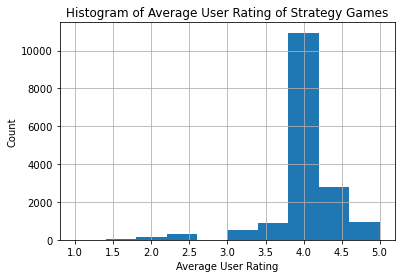

In [19]:
games_clean['Average User Rating'].hist()
plt.title ('Histogram of Average User Rating of Strategy Games')
plt.xlabel('Average User Rating')
plt.ylabel('Count')

The average user rating of strategy games are rated 4.0. 

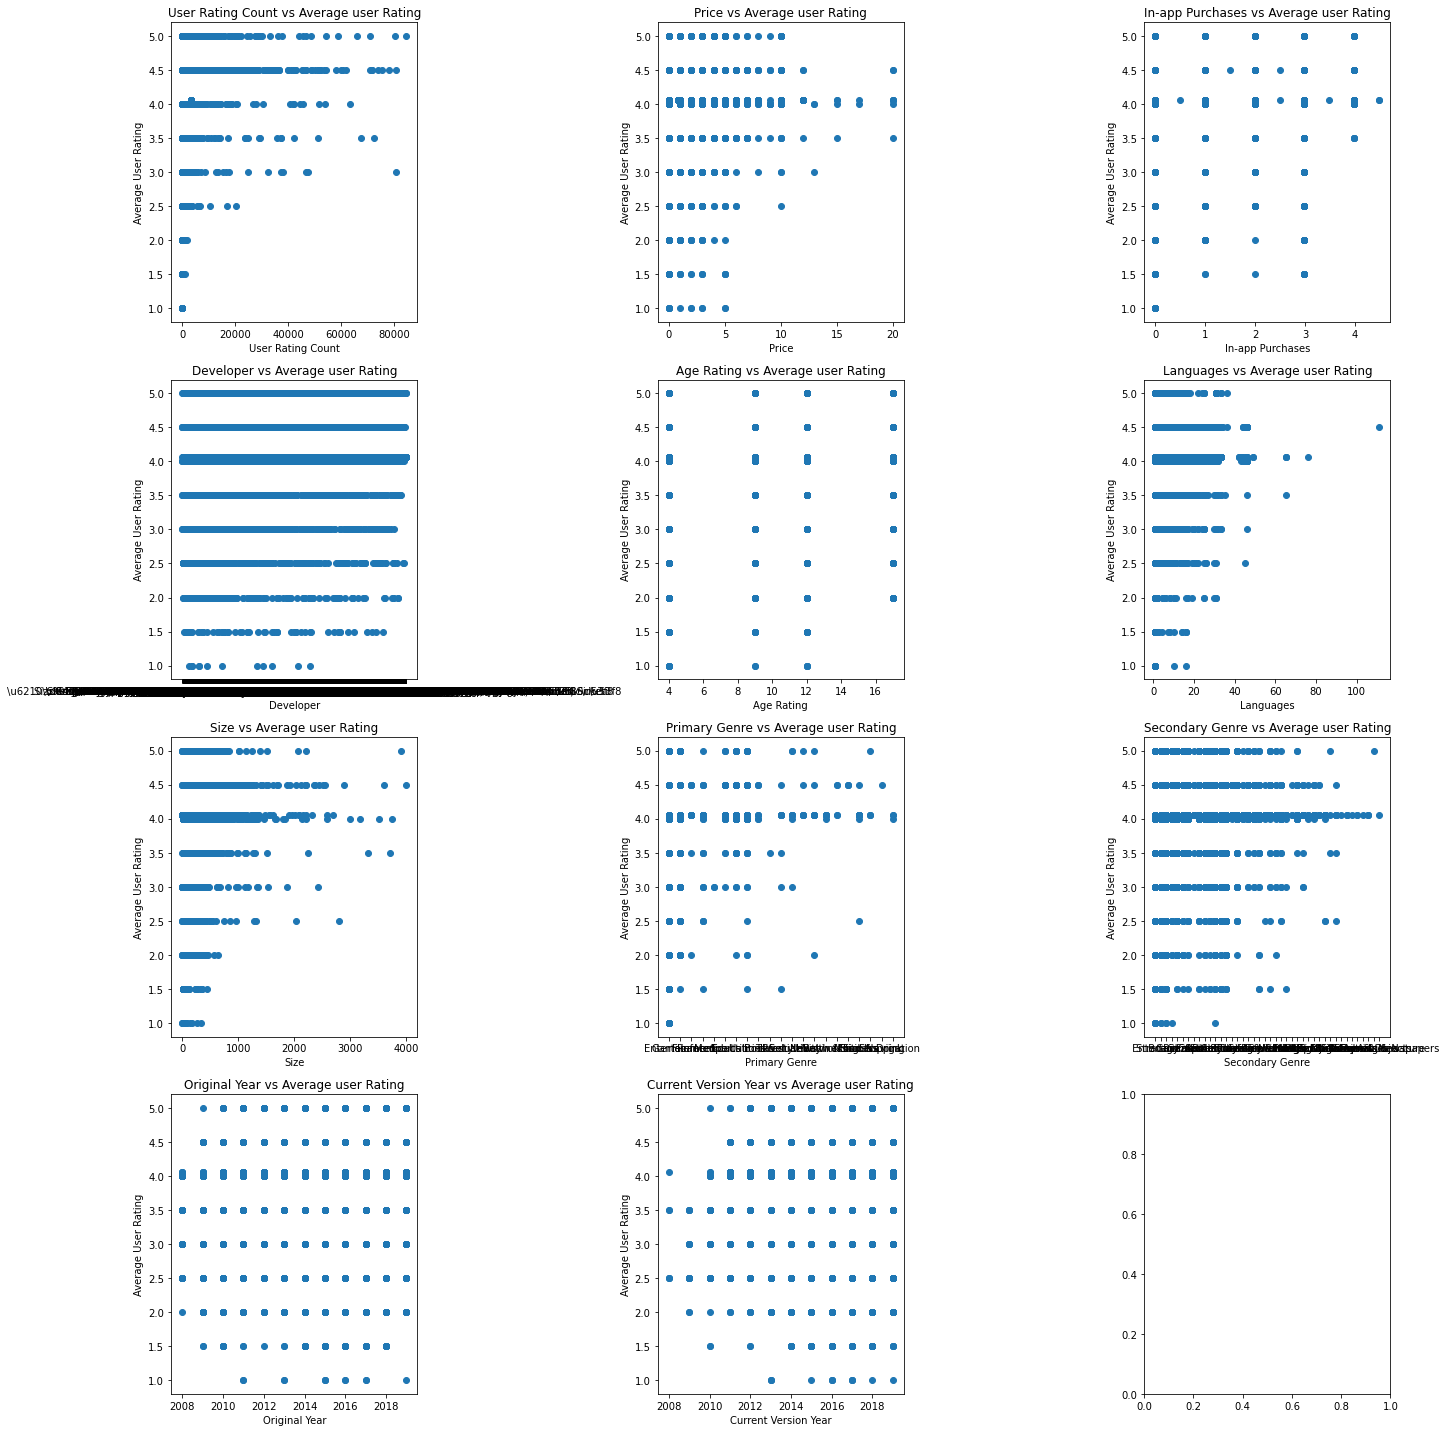

In [20]:
#Visualise relationship between features and the response variable using scatter plots

features = games_clean.drop(columns = ['Average User Rating'])

columns_to_plot = features

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for index, column in enumerate(columns_to_plot):
    ax = axes[index]
    ax.scatter(columns_to_plot[column], games_clean['Average User Rating'])
    ax.set_title(f'{column} vs Average user Rating')
    ax.set_xlabel(column)
    ax.set_ylabel('Average User Rating')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show() 


Since we have removed the outliers above, we can see the relationship between the feature variables and the target variable clearer than before. 

Overall, there does not appear to be any strong linear relationships between the feature variables and the user ratings. 

#### User Rating Count

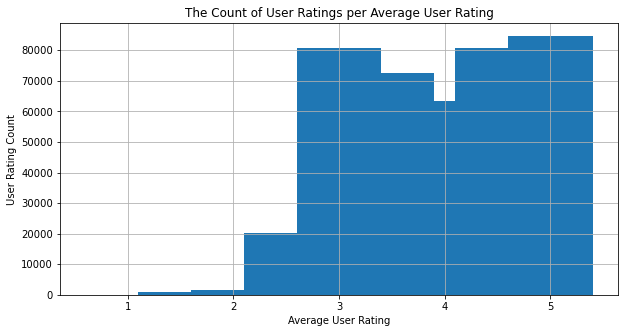

In [21]:
plt.figure(figsize = (10,5))
plt.bar(games_clean['Average User Rating'], games_clean['User Rating Count'])
plt.xlabel('Average User Rating')
plt.ylabel('User Rating Count')
plt.title('The Count of User Ratings per Average User Rating')
plt.grid()

This looks very similar to our average user rating graph, that the majority of the data is centered around the 4.0. We can see that the higher the number of User Ratings, the higher the rating. 


#### Price and In-App Purchases

Text(0, 0.5, 'Count')

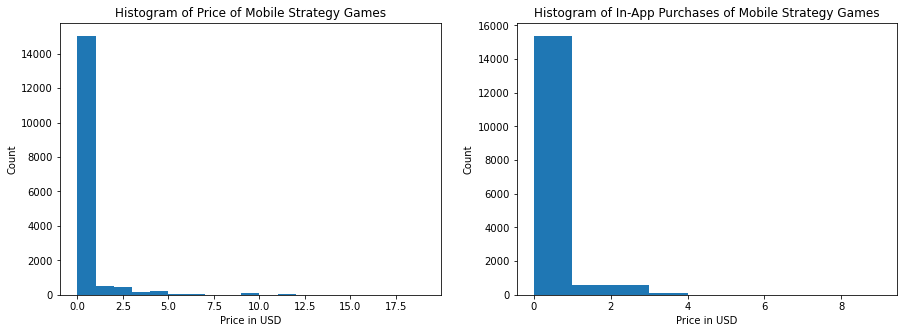

In [22]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(games_clean['Price'], range(0, 20))  
plt.title('Histogram of Price of Mobile Strategy Games')
plt.xlabel('Price in USD')
plt.ylabel('Count')
#There is an outlier of an app price with $179.99 therefore limited the range
#for visualisation purposes only

plt.subplot(1, 2, 2)
plt.hist(games_clean['In-app Purchases'], range(0, 10))
plt.title('Histogram of In-App Purchases of Mobile Strategy Games')
plt.xlabel('Price in USD')
plt.ylabel('Count')



These two graphs look very similar as well. 
Majority of these apps are free-to-play or cost less than $5 as an upfront fee to download and begin playing. These apps also have low-cost in-app purchases. 

#### Languages

Text(0.5, 1.0, 'The Count of Languages in Mobile Gaming Apps')

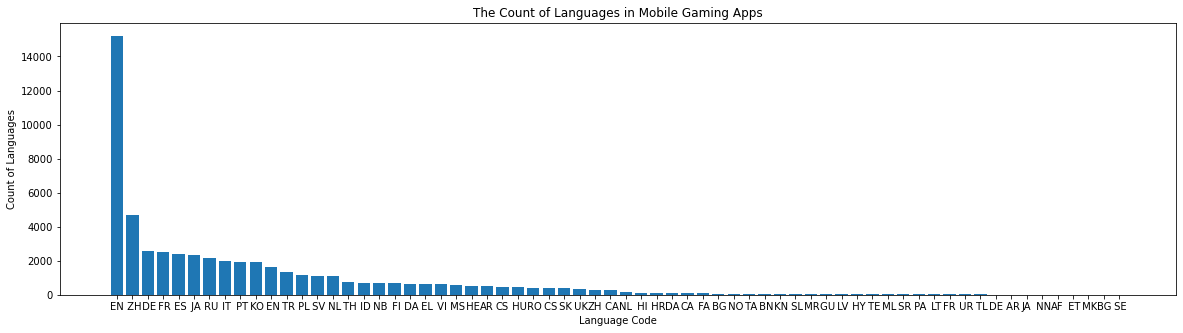

In [23]:
games_languages = games['Languages'].str.split(',', expand = True).stack()
lang_count = games_languages.value_counts().to_dict()
len(lang_count.keys()) #139 

#For the purpose of the visualisation, as there are 139 unique values in total 
#remove any dictionary value that is 10 or less so it can all fit on the graph
lang_vis = {key: value for key, value in lang_count.items() if value > 10}

plt.figure(figsize = (20,5))
plt.bar(lang_vis.keys(), lang_vis.values())
plt.xlabel('Language Code')
plt.ylabel('Count of Languages')
plt.title('The Count of Languages in Mobile Gaming Apps')


Our most popular language for these mobile app games is **English** (EN), followed by Chinese (ZH) and then German (DE).

I have attached a link to the list of ISO language codes for further clarification of the codes - https://en.wikipedia.org/wiki/List_of_ISO_639_language_codes


Another important feature to look at are the genres of these mobile games. 

#### Genres

In [24]:
games['Genres'].value_counts()

Games, Strategy, Puzzle                                           778
Games, Puzzle, Strategy                                           694
Games, Strategy                                                   588
Games, Strategy, Action                                           483
Games, Simulation, Strategy                                       465
                                                                 ... 
Health & Fitness, Casual, Games, Strategy                           1
Stickers, Places & Objects, Strategy, Games, Adventure, Gaming      1
Finance, Strategy, Simulation, Games                                1
Social Networking, Adventure, Strategy, Games                       1
Games, Travel, Board, Strategy                                      1
Name: Genres, Length: 1004, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

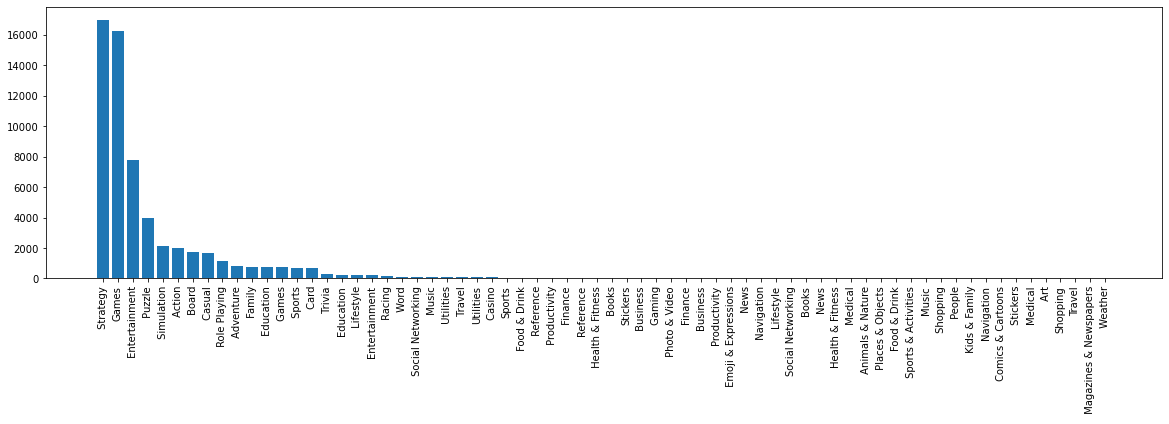

In [25]:
#Some games have multiple genres, so want to split the genre column into 
#its unique genres.
games_genres = games['Genres'].str.split(',', expand = True).stack()

genre_count = games_genres.value_counts().to_dict()
len(genre_count.keys()) #68 

plt.figure(figsize = (20,5))
plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation = 90)


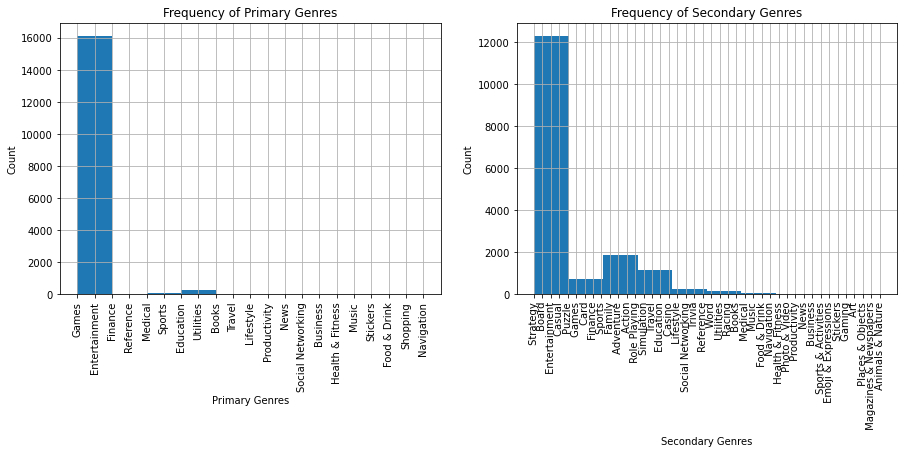

In [26]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(games_clean['Primary Genre'], align = 'mid')  
plt.title('Frequency of Primary Genres')
plt.xlabel('Primary Genres')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(games_clean['Secondary Genre'], align = 'mid')
plt.title('Frequency of Secondary Genres')
plt.xlabel('Secondary Genres')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid()


Games are our most frequent genre with Strategy games as the most popular form of game.


#### Size

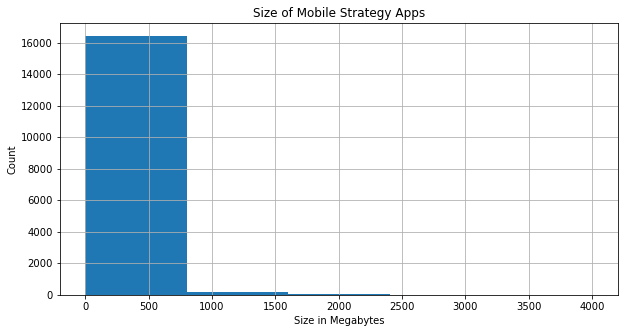

In [27]:
plt.figure(figsize = (10, 5))
plt.hist(games_clean['Size'], bins = 5)
plt.title('Size of Mobile Strategy Apps')
plt.xlabel('Size in Megabytes')
plt.ylabel('Count')
plt.grid()

Majority of these mobile game apps are within 7500MB in size.

In [28]:
#To understand the correlation structure, removing the target variable Average User Rating
#to see how the predictors relate to each other

games_corr = features

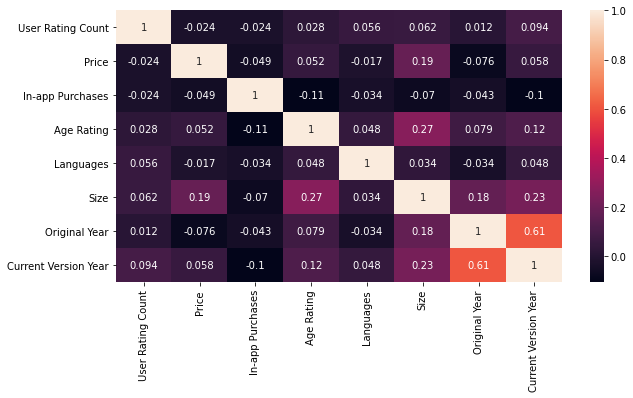

In [29]:
fig, ax = plt.subplots(figsize = (10,5))
sns.heatmap(games_corr.corr(), annot = True)
plt.show()

Looking at this dataset, there are **no**  variables that are highly correlated with each other suggesting that we will most likely not have issues with multicollinearity.

## Preparing the Model

* Encode the data
* Split the data
* Scale the data


*Encode the Data*

Current variables in our dataset are: <br>
Categorical: Developer, Age Rating, Languages, Primary Genre, Secondary Genre <br>
Continuous: Average User Rating, User Rating Count, Price, In-app Purchases, Size,  Original Year, Current Version Year

In [30]:
categorical = pd.DataFrame(games_clean.select_dtypes(include=['object']))
# This leads to Developer, Primary Genre, Secondary Genre


In [31]:
games_ohe = pd.get_dummies(categorical, drop_first = True)
games_prepped = games_clean.drop(columns = ['Average User Rating','Developer', 'Primary Genre', 'Secondary Genre',])
games_ohe_prepped = pd.concat([games_ohe.reset_index(drop=True), games_prepped.reset_index(drop=True)], axis=1)


In [32]:
games_ohe_prepped

Developer_"ByteRockers' Games GmbH & Co. KG"  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
16630                                             0   
16631                                             0   
16632                                             0   
16633                                             0   
16634                                             0   

       Developer_"Daniel O'Sullivan"  Developer_"Don't Blink Studios"  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
...                              ...                              ...   
16630                              0                                0   
16631                              0                                0   
16632                              0                                0   
16633                              0                                0   
16634                              0                                0   

       Developer_"Ellie's Games, LLC"  Developer_"Galen O'Shea"  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
3                                   0                         0   
4                                   0                         0   
...                               ...                       ...   
16630                               0                         0   
16631                               0                         0   
16632                               0                         0   
16633                               0                         0   
16634                               0                         0   

       Developer_"Igor's Software Labs LLC"  Developer_"It's All A Game LLC"  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   
...                                     ...                              ...   
16630                                     0                                0   
16631                                     0                                0   
16632                                     0                                0   
16633                                     0                                0   
16634                                     0                                0   

       Developer_"Joe o'donovan"  Developer_"Jordan Development's \u2122"  \
0                              0                                        0   
1                              0                                        0   
2                              0                                        0   
3                              0                                        0   
4                              0                                        0   
...                          ...                                      ...   
16630                          0                                        0   
16631                          0                                        0   
16632     

*Split the data*

In [33]:
#Split data into train/test split to prevent data leakage
X = games_ohe_prepped
y = games_clean['Average User Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Length of the training and test set:", len(X_train), len(X_test), len(y_train), len(y_test))

Length of the training and test set: 12476 4159 12476 4159


*Scale the data*

In [34]:
scaler = StandardScaler()
X_train_normalised = scaler.fit_transform(X_train)
X_test_normalised = scaler.transform(X_test)


### Build the First Model

In [35]:
#Run the model

X_train_int = sm.add_constant(X_train_normalised)
model = sm.OLS(y_train, X_train_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average User Rating   R-squared:                       0.677
Model:                             OLS   Adj. R-squared:                  0.256
Method:                  Least Squares   F-statistic:                     1.606
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):           7.52e-75
Time:                         19:10:40   Log-Likelihood:                -2081.4
No. Observations:                12476   AIC:                         1.830e+04
Df Residuals:                     5407   BIC:                         7.083e+04
Df Model:                         7068                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0619      0.004   1044.684      0.000       4.054       4.069
x1         -4.345e+11   7.61e+11     -0.571      0.568   -1.93e+12    1.06e+12
x2            -0.0007      0.006     -0.129      0.898      -0.012       0.010
x3             0.0018      0.007      0.270      0.787      -0.011       0.015
x4             0.0054      0.006      0.962      0.336      -0.006       0.016
x5         -2.643e+11   6.06e+11     -0.436      0.663   -1.45e+12    9.23e+11
x6             0.0039      0.006      0.695      0.487      -0.007       0.015
x7             0.0076      0.006      1.364      0.173      -0.003       0.018
x8            -0.0023      0.006     -0.423      0.672      -0.013       0.009
x9            -0.0005      0.006     -0.087      0.931      -0.011       0.010
x10            0.0004      0.006      0.080      0.936      -0.011       0.011
x11           -0.0070      0.006     -1.261      0.207      -0.018       0.004
x12           -0.0004      0.006     -0.078      0.938      -0.011       0.010
x13           -0.0031      0.006     -0.559      0.576      -0.014       0.008
x14         7.038e-05      0.006      0.013      0.990      -0.011       0.011
x15           -0.0035      0.006     -0.629      0.529      -0.014       0.007
x16           -0.0094      0.006     -1.689      0.091      -0.020       0.002
x17           -0.0019      0.006     -0.343      0.732      -0.013       0.009
x18           -0.0045      0.006     -0.804      0.421      -0.016       0.007
x19           -0.0093      0.010     -0.974      0.330      -0.028       0.009
x20         1.299e+11   6.12e+11      0.212      0.832   -1.07e+12    1.33e+12
x21            0.0077      0.008      0.988      0.323      -0.008       0.023
x22           -0.0011      0.006     -0.194      0.846      -0.012       0.010
x23           -0.0015      0.006     -0.272      0.786      -0.012       0.009
x24           -0.0036      0.006     -0.656      0.512      -0.015       0.007
x25           -0.0161      0.006     -2.906      0.004      -0.027      -0.005
x26           -0.0017      0.008     -0.219      0.827      -0.017       0.014
x27           -0.0091      0.006     -1.649      0.099      -0.020       0.002
x28            0.0076      0.006      1.375      0.169      -0.003       0.018
x29           -0.0020      0.008     -0.253      0.800      -0.017       0.013
x30           -0.0006      0.006     -0.105      0.917      -0.011       0.010
x31           -0.0029      0.007     -0.432      0.666      -0.016       0.010
x32            0.0084      0.010      0.819      0.413      -0.012       0.029
x33           -0.0006      0.006     -0.099      0.921      -0.011       0.010
x34            0.0009      0.010      0.098      0.922      -0.018       0.020
x35        -9.653e+08    2.5e+11     -0.004      0.997   -4.91e+11    

R^2: 0.677 - 67% of the variance in the target variable User Ratings can be explained by the predictor features. Around 67% of the data fits on the regression model.
<br>
Adjusted R-squared value: 0.256 - This is a modified R^2 that has been adjusted by the number of predictors in the model. There are some variables here that do not appear to contribute to the model.

The adjusted R2 increases when a new variable improves the model more than would be expected by chance. It decreases when a predictor improves the model less than expected. A very low R2 value generally indicates underfitting, which means adding additional relevant features or using a more complex model might help.
<br>

p_value (lists as Prob F-statistic), since this is less than 0 we can reject the null hypothesis.



#### Check the Linearity Assumptions

In [36]:
residuals = model.resid

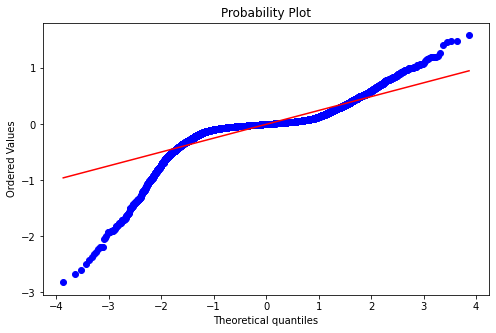

In [37]:
import scipy as sp

fig, ax = plt.subplots(figsize = (8, 5))
sp.stats.probplot(residuals, plot = ax, fit = True)
plt.show()

#Most of the data points fall somewhere on the line so meets the normality assumption

Text(0.5, 0.99, 'Residuals Scatterplot')

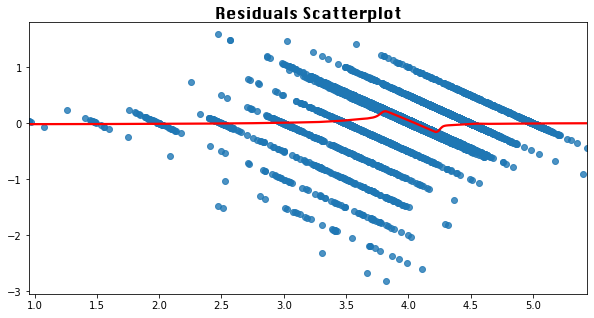

In [38]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

#Residuals are uniform across in a linear line 

### Build the Second Model

In [39]:
#Build 2nd model, attempt to reduce size of condition number
#Pick new categoricals: Age Rating, Primary Genre, Secondary Genre
#Dropping Developer as it an extremely large increase in new columns with dummy implementation
#therefore it may be affecting how the model runs

games2_clean = games_clean.drop(columns = ['Average User Rating', 'Developer'])

categoricals2 = ['Age Rating','Primary Genre', 'Secondary Genre']

#Implement dummies
games_ohe2 = pd.get_dummies(games2_clean[categoricals2], drop_first = True)
games_prepped2 = games2_clean.drop(columns = ['Age Rating','Primary Genre', 'Secondary Genre'])
games_ohe_prepped2 = pd.concat([games_ohe2, games_prepped2], axis = 1)

games_ohe_prepped2

Age Rating  Primary Genre_Business  Primary Genre_Education  \
0             4.0                       0                        0   
1             4.0                       0                        0   
2             4.0                       0                        0   
4             4.0                       0                        0   
5             4.0                       0                        0   
...           ...                     ...                      ...   
17002         4.0                       0                        0   
17003         4.0                       0                        0   
17004         4.0                       0                        0   
17005         4.0                       0                        0   
17006         4.0                       0                        0   

       Primary Genre_Entertainment  Primary Genre_Finance  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
4                                0                      0   
5                                0                      0   
...                            ...                    ...   
17002                            0                      0   
17003                            0                      0   
17004                            0                      0   
17005                            0                      0   
17006                            0                      0   

       Primary Genre_Food & Drink  Primary Genre_Games  \
0                               0                    1   
1                               0                    1   
2                               0                    1   
4                               0                    1   
5                               0                    1   
...                           ...                  ...   
17002                           0                    1   
17003                           0                    1   
17004                           0                    1   
17005                           0                    1   
17006                           0                    1   

       Primary Genre_Health & Fitness  Primary Genre_Lifestyle  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
4                                   0                        0   
5                                   0                        0   
...                               ...                      ...   
17002                               0                        0   
17003                               0                        0   
17004                               0                        0   
17005                               0                        0   
17006                               0                        0   

       Primary Genre_Medical  ...  Secondary Genre_ Trivia  \
0                          0  ...                        0   
1                          0  ...                        0   
2                          0  ...                        0   
4                          0  ...                        0   
5                          0  ...                        0   
...                      ...  ...                      ...   
17002                      0  ...                        0   
17003                      0  ...                        0   
17004                      0  ...                        0   
17005                      0  ...                        0   
17006                      0  ...                        0   

       Secondary Genre_ Utilities  Secondary Genre_ Word  User Rating Count  \
0                               0                      0        3553.000000   
1                               0       

In [40]:
X2 = games_ohe_prepped2
y2 = games_clean['Average User Rating']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [41]:
X2_train_normalised = scaler.fit_transform(X2_train)
X2_test_normalised = scaler.transform(X2_test)

In [42]:
X2_train_int = sm.add_constant(X2_train_normalised)
model2 = sm.OLS(y2_train, X2_train_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average User Rating   R-squared:                       0.053
Model:                             OLS   Adj. R-squared:                  0.048
Method:                  Least Squares   F-statistic:                     10.30
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):          2.13e-102
Time:                         19:11:03   Log-Likelihood:                -8795.3
No. Observations:                12476   AIC:                         1.773e+04
Df Residuals:                    12407   BIC:                         1.824e+04
Df Model:                           68                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0619      0.004    923.907      0.000       4.053       4.070
x1            -0.0070      0.005     -1.455      0.146      -0.016       0.002
x2            -0.0028      0.006     -0.475      0.635      -0.015       0.009
x3            -0.0156      0.024     -0.644      0.519      -0.063       0.032
x4            -0.0200      0.022     -0.905      0.365      -0.063       0.023
x5            -0.0065      0.008     -0.850      0.395      -0.021       0.008
x6             0.0021      0.005      0.397      0.691      -0.008       0.013
x7            -0.0208      0.040     -0.514      0.607      -0.100       0.059
x8            -0.0010      0.005     -0.190      0.849      -0.012       0.010
x9            -0.0178      0.006     -2.738      0.006      -0.030      -0.005
x10           -0.0073      0.005     -1.538      0.124      -0.017       0.002
x11            0.0040      0.005      0.734      0.463      -0.007       0.015
x12           -0.0022      0.005     -0.432      0.666      -0.012       0.008
x13            0.0010      0.006      0.174      0.862      -0.011       0.013
x14           -0.0016      0.007     -0.235      0.814      -0.015       0.012
x15           -0.0201      0.009     -2.148      0.032      -0.038      -0.002
x16            0.0018      0.005      0.380      0.704      -0.008       0.011
x17           -0.0068      0.006     -1.192      0.233      -0.018       0.004
x18           -0.0054      0.013     -0.430      0.668      -0.030       0.019
x19           -0.0101      0.010     -1.002      0.317      -0.030       0.010
x20         -1.61e-17   3.96e-18     -4.061      0.000   -2.39e-17   -8.33e-18
x21           -0.0092      0.014     -0.640      0.522      -0.037       0.019
x22           -0.0004      0.005     -0.078      0.938      -0.011       0.010
x23           -0.0003      0.005     -0.057      0.954      -0.009       0.009
x24            0.0009      0.005      0.199      0.842      -0.008       0.010
x25           -0.0194      0.006     -3.220      0.001      -0.031      -0.008
x26           -0.0040      0.004     -0.907      0.364      -0.013       0.005
x27           -0.0083      0.004     -1.876      0.061      -0.017       0.000
x28           -0.0044      0.005     -0.875      0.382      -0.014       0.006
x29            0.0008      0.004      0.169      0.866      -0.008       0.009
x30            0.0042      0.006      0.712      0.476      -0.007       0.016
x31           -0.0009      0.005     -0.176      0.860      -0.011       0.009
x32            0.0006      0.005      0.131      0.896      -0.009       0.010
x33           -0.0066      0.008     -0.775      0.439      -0.023       0.010
x34           -0.0006      0.005     -0.110      0.912      -0.011       0.010
x35            0.0017      0.004      0.376      0.707      -0.007    

R^2: 0.053 - 5% of the variance in the target variable User Ratings can be explained by the predictor features. Around 5% of the data fits on the regression model.
<br>
Adjusted R-squared value: 0.048 - This is a modified R^2 that has been adjusted by the number of predictors in the model. 
The R^2 and adjusted R^2 are quite similar in values which means that this model has not been too penalised by the addition of multiple features.
<br>

p_value (lists as Prob F-statistic), since this is less than 0 we can reject the null hypothesis.


### Build the 3rd model 

In [43]:
#Build 3rd model, attempt to reduce size of condition number and increase R2

games3_clean = games_clean.drop(columns = ['Average User Rating'])

categoricals3 = ['Age Rating','Developer', 'Languages', 'Primary Genre', 'Secondary Genre']

#Implement dummies
games_ohe3 = pd.get_dummies(games3_clean[categoricals3], drop_first = True)
games_prepped3 = games3_clean.drop(columns = ['Age Rating','Developer', 'Languages', 'Primary Genre', 'Secondary Genre'])
games_ohe_prepped3 = pd.concat([games_ohe3, games_prepped3], axis = 1)

games_ohe_prepped3

Age Rating  Languages  Developer_"ByteRockers' Games GmbH & Co. KG"  \
0             4.0         17                                             0   
1             4.0          1                                             0   
2             4.0          1                                             0   
4             4.0         15                                             0   
5             4.0          1                                             0   
...           ...        ...                                           ...   
17002         4.0          1                                             0   
17003         4.0          1                                             0   
17004         4.0          1                                             0   
17005         4.0          1                                             0   
17006         4.0          2                                             0   

       Developer_"Daniel O'Sullivan"  Developer_"Don't Blink Studios"  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
4                                  0                                0   
5                                  0                                0   
...                              ...                              ...   
17002                              0                                0   
17003                              0                                0   
17004                              0                                0   
17005                              0                                0   
17006                              0                                0   

       Developer_"Ellie's Games, LLC"  Developer_"Galen O'Shea"  \
0                                   0                         0   
1                                   0                         0   
2                                   0                         0   
4                                   0                         0   
5                                   0                         0   
...                               ...                       ...   
17002                               0                         0   
17003                               0                         0   
17004                               0                         0   
17005                               0                         0   
17006                               0                         0   

       Developer_"Igor's Software Labs LLC"  Developer_"It's All A Game LLC"  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
4                                         0                                0   
5                                         0                                0   
...                                     ...                              ...   
17002                                     0                                0   
17003                                     0                                0   
17004                                     0                                0   
17005                                     0                                0   
17006                                     0                                0   

       Developer_"Joe o'donovan"  ...  Secondary Genre_ Travel  \
0                              0  ...                        0   
1                              0  ...                        0   
2                              0  ...                        0   
4                              0  ...                        0   
5                              0  ...                        0   
...                          ..

In [44]:
X3 = games_ohe_prepped3
y3 = games_clean['Average User Rating']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [45]:
X3_train_normalised = scaler.fit_transform(X3_train)
X3_test_normalised = scaler.transform(X3_test)

In [46]:
X3_train_int = sm.add_constant(X3_train_normalised)
model3 = sm.OLS(y3_train, X3_train_int).fit()

In [47]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average User Rating   R-squared:                       0.677
Model:                             OLS   Adj. R-squared:                  0.255
Method:                  Least Squares   F-statistic:                     1.603
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):           3.09e-74
Time:                         19:20:53   Log-Likelihood:                -2090.0
No. Observations:                12476   AIC:                         1.832e+04
Df Residuals:                     5407   BIC:                         7.085e+04
Df Model:                         7068                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0619      0.004   1043.968      0.000       4.054       4.070
x1            -0.0027      0.010     -0.282      0.778      -0.021       0.016
x2             0.0098      0.010      1.019      0.308      -0.009       0.029
x3         -9.024e+11   4.68e+11     -1.927      0.054   -1.82e+12    1.57e+10
x4             0.0007      0.006      0.119      0.905      -0.010       0.012
x5             0.0004      0.007      0.066      0.947      -0.013       0.014
x6             0.0038      0.006      0.675      0.500      -0.007       0.015
x7          1.374e+12   6.19e+11      2.219      0.027     1.6e+11    2.59e+12
x8             0.0027      0.006      0.491      0.623      -0.008       0.014
x9             0.0076      0.006      1.359      0.174      -0.003       0.018
x10           -0.0011      0.006     -0.203      0.839      -0.012       0.010
x11           -0.0017      0.006     -0.302      0.763      -0.013       0.009
x12            0.0020      0.006      0.348      0.728      -0.009       0.013
x13           -0.0064      0.006     -1.143      0.253      -0.017       0.005
x14           -0.0004      0.006     -0.076      0.939      -0.011       0.011
x15           -0.0025      0.006     -0.452      0.651      -0.013       0.008
x16           -0.0011      0.006     -0.194      0.846      -0.012       0.010
x17           -0.0031      0.006     -0.558      0.577      -0.014       0.008
x18           -0.0105      0.006     -1.895      0.058      -0.021       0.000
x19           -0.0018      0.006     -0.327      0.743      -0.013       0.009
x20           -0.0057      0.006     -1.005      0.315      -0.017       0.005
x21           -0.0096      0.010     -0.999      0.318      -0.028       0.009
x22         -5.08e+11   8.25e+11     -0.616      0.538   -2.13e+12    1.11e+12
x23            0.0071      0.008      0.909      0.363      -0.008       0.022
x24           -0.0020      0.006     -0.369      0.712      -0.013       0.009
x25           -0.0004      0.006     -0.065      0.948      -0.011       0.011
x26           -0.0021      0.006     -0.371      0.710      -0.013       0.009
x27           -0.0153      0.006     -2.752      0.006      -0.026      -0.004
x28           -0.0017      0.008     -0.217      0.828      -0.017       0.014
x29           -0.0079      0.006     -1.424      0.154      -0.019       0.003
x30            0.0077      0.006      1.385      0.166      -0.003       0.019
x31           -0.0015      0.008     -0.196      0.845      -0.017       0.014
x32           -0.0015      0.006     -0.260      0.795      -0.012       0.009
x33           -0.0032      0.007     -0.470      0.638      -0.016       0.010
x34            0.0076      0.010      0.739      0.460      -0.013       0.028
x35           -0.0014      0.006     -0.247      0.805      -0.012    

R^2: 0.677 - 67% of the variance in the target variable User Ratings can be explained by the predictor features. Around 67% of the data fits on the regression model.
<br>
Adjusted R-squared value: 0.255 - This is a modified R^2 that has been adjusted by the number of predictors in the model. There are some variables here that do not appear to contribute to the model.

<br>

p_value (lists as Prob F-statistic), since this is less than 0 we can reject the null hypothesis.

This model has very similar performance to our first model which our categorical variables were Developer, Primary Genre and Secondary Genre.



#### Build the Fourth model

In [48]:
#Build 4th model, attempt to reduce size of condition number and increase R2

games4_clean = games_clean.drop(columns = ['Average User Rating', 'Developer', 'Secondary Genre'])

categoricals4 = ['Age Rating', 'Languages', 'Primary Genre', 'Original Year', 'Current Version Year']

#Implement dummies
games_ohe4 = pd.get_dummies(games4_clean[categoricals4], drop_first = True)
games_prepped4 = games4_clean.drop(columns = ['Age Rating', 'Languages', 'Primary Genre', 'Original Year', 'Current Version Year'])
games_ohe_prepped4 = pd.concat([games_ohe4, games_prepped4], axis = 1)

games_ohe_prepped4

Age Rating  Languages  Original Year  Current Version Year  \
0             4.0         17           2008                  2017   
1             4.0          1           2008                  2018   
2             4.0          1           2008                  2017   
4             4.0         15           2008                  2018   
5             4.0          1           2008                  2019   
...           ...        ...            ...                   ...   
17002         4.0          1           2019                  2019   
17003         4.0          1           2019                  2019   
17004         4.0          1           2019                  2019   
17005         4.0          1           2019                  2019   
17006         4.0          2           2019                  2019   

       Primary Genre_Business  Primary Genre_Education  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
4                           0                        0   
5                           0                        0   
...                       ...                      ...   
17002                       0                        0   
17003                       0                        0   
17004                       0                        0   
17005                       0                        0   
17006                       0                        0   

       Primary Genre_Entertainment  Primary Genre_Finance  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
4                                0                      0   
5                                0                      0   
...                            ...                    ...   
17002                            0                      0   
17003                            0                      0   
17004                            0                      0   
17005                            0                      0   
17006                            0                      0   

       Primary Genre_Food & Drink  Primary Genre_Games  ...  \
0                               0                    1  ...   
1                               0                    1  ...   
2                               0                    1  ...   
4                               0                    1  ...   
5                               0                    1  ...   
...                           ...                  ...  ...   
17002                           0                    1  ...   
17003                           0                    1  ...   
17004                           0                    1  ...   
17005                           0                    1  ...   
17006                           0                    1  ...   

       Primary Genre_Shopping  Primary Genre_Social Networking  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
4                           0                                0   
5                           0                                0   
...                       ...                              ...   
17002                       0                                0   
17003                       0                                0   
17004                       0                                0   
17005                       0                                0   
17006                       0                                0   

       Primary Genre_Sports  Primary Genre_Stickers  Primary Genre_Travel  \
0                         0                       0                     0   
1                         0                 

In [49]:
X4 = games_ohe_prepped4
y4 = games_clean['Average User Rating']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

In [50]:
X4_train_normalised = scaler.fit_transform(X4_train)
X4_test_normalised = scaler.transform(X4_test)

In [51]:
X4_train_int = sm.add_constant(X4_train_normalised)
model4 = sm.OLS(y4_train, X4_train_int).fit()

In [52]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Average User Rating   R-squared:                       0.048
Model:                             OLS   Adj. R-squared:                  0.046
Method:                  Least Squares   F-statistic:                     23.43
Date:                 Mon, 26 Feb 2024   Prob (F-statistic):          6.14e-113
Time:                         19:21:04   Log-Likelihood:                -8828.8
No. Observations:                12476   AIC:                         1.771e+04
Df Residuals:                    12448   BIC:                         1.792e+04
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0619      0.004    922.954      0.000       4.053       4.070
x1            -0.0074      0.005     -1.601      0.109      -0.016       0.002
x2             0.0021      0.004      0.483      0.629      -0.007       0.011
x3             0.0515      0.006      9.056      0.000       0.040       0.063
x4             0.0571      0.006      9.914      0.000       0.046       0.068
x5            -0.0029      0.006     -0.492      0.623      -0.015       0.009
x6            -0.0160      0.024     -0.665      0.506      -0.063       0.031
x7            -0.0209      0.022     -0.946      0.344      -0.064       0.022
x8            -0.0077      0.008     -1.010      0.312      -0.023       0.007
x9             0.0021      0.005      0.395      0.693      -0.008       0.013
x10           -0.0216      0.040     -0.534      0.593      -0.101       0.058
x11           -0.0009      0.005     -0.169      0.865      -0.011       0.010
x12           -0.0177      0.006     -2.727      0.006      -0.030      -0.005
x13           -0.0073      0.005     -1.532      0.126      -0.017       0.002
x14            0.0044      0.005      0.818      0.413      -0.006       0.015
x15           -0.0029      0.005     -0.572      0.567      -0.013       0.007
x16            0.0009      0.006      0.155      0.877      -0.011       0.013
x17           -0.0023      0.007     -0.325      0.745      -0.016       0.011
x18           -0.0202      0.009     -2.158      0.031      -0.038      -0.002
x19            0.0022      0.005      0.470      0.638      -0.007       0.012
x20           -0.0072      0.006     -1.263      0.207      -0.018       0.004
x21           -0.0063      0.013     -0.501      0.616      -0.031       0.018
x22           -0.0095      0.009     -1.021      0.307      -0.028       0.009
x23         4.638e-18   1.94e-18      2.386      0.017    8.27e-19    8.45e-18
x24           -0.0098      0.014     -0.682      0.496      -0.038       0.018
x25            0.0385      0.004      8.655      0.000       0.030       0.047
x26            0.0026      0.005      0.564      0.573      -0.006       0.011
x27           -0.0015      0.004     -0.333      0.739      -0.010       0.007
x28            0.0011      0.005      0.224      0.823      -0.008       0.010
==============================================================================
Omnibus:                     4296.714   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24363.933
Skew:                          -1.547   Prob(JB):                         0.00
Kurtosis:                       9.107   Cond. No.                     1.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the e

Model 1 and 3 are very similar in performance, Model 2 and 4 are very similar performance so I will evaluate between Model 1 and Model 2 to see which performs better.

### Model Evaluation

*First model evaluation*

In [53]:
model1 = LinearRegression()
model1.fit(X_train_normalised, y_train)
     

LinearRegression()

Accuracy: -7.429308859187968e+25


Text(0.5, 1.0, 'Model 1 Rating Actual vs Predicted Values')

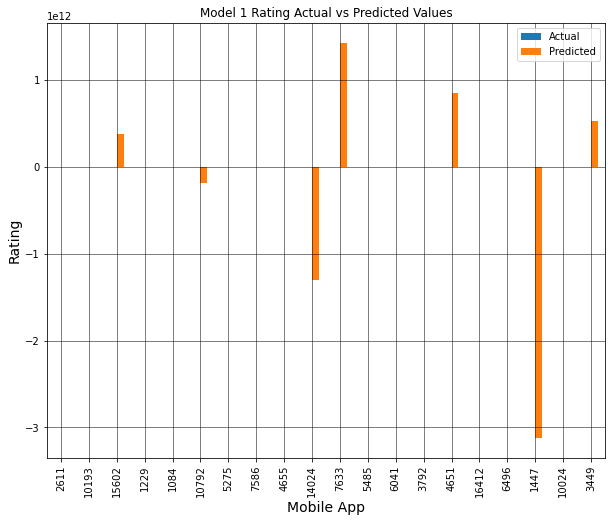

In [54]:
y_pred_test = model1.predict(X_test_normalised)
y_pred_train = model1.predict(X_train_normalised)
accuracy = model1.score(X_test_normalised, y_test)
print('Accuracy:', accuracy)

#Actual vs Predicted Rating values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test}) 
df2 = df1.head(20)

#Visualisation
df2.plot(kind='bar',figsize=(10,8)) 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
plt.xlabel('Mobile App',color='black',fontsize=14)
plt.ylabel('Rating',color='black',fontsize = 14)
plt.title('Model 1 Rating Actual vs Predicted Values')

In [55]:
print ('Train Mean Squared Error: '+ str(metrics.mean_squared_error(y_train,y_pred_train)))
print ('Test Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,y_pred_test)))


Train Mean Squared Error: 0.1458837018829821
Test Mean Squared Error: 1.7520400213040188e+25


*Second model evaluation*

Accuracy: 0.05765435489999371


Text(0, 0.5, 'Rating')

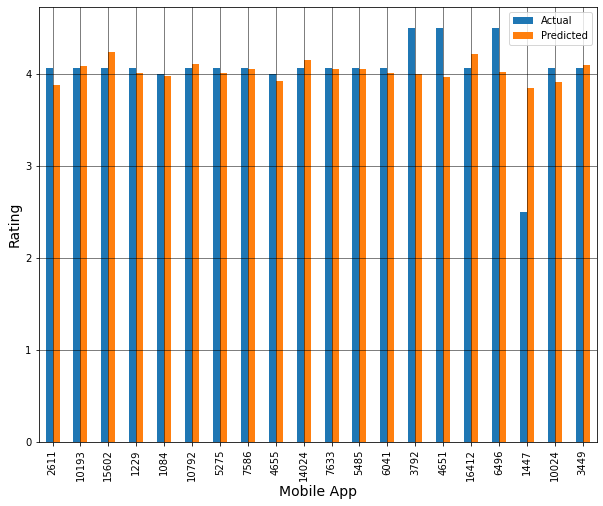

In [56]:
model2 = LinearRegression()
model2.fit(X2_train_normalised, y2_train)

y2_pred_test = model2.predict(X2_test_normalised)
y2_pred_train = model2.predict(X2_train_normalised)
accuracy2 = model2.score(X2_test_normalised, y2_test)
print('Accuracy:', accuracy2)

#Actual vs Predicted Values
df3 = pd.DataFrame({'Actual': y2_test, 'Predicted': y2_pred_test}) 
df4 = df3.head(20)

#Visualisation
df4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
plt.xlabel('Mobile App',color='black',fontsize=14)
plt.ylabel('Rating',color='black',fontsize = 14)

In [57]:
print ('Train Mean Squared Error: '+ str(metrics.mean_squared_error(y_train, y2_pred_train)))
print ('Test Mean Squared Error: '+ str(metrics.mean_squared_error(y_test, y2_pred_test)))

Train Mean Squared Error: 0.2398071778731519
Test Mean Squared Error: 0.22223161203951125


Our Model 1 has a better R2 value however it has a high MSE which suggests high overfitting. Not only that, there is a large difference between the train and test MSE which also demonstrates overfitting. This model would not perform well for new data. 

Our Model 2 while has lower R2 value it has a much better MSE which means we are not overfitting and will perform similarly when exposed to new data. The difference between train and test MSE are very similar which also indicates that this model is not overfitting.

**Pick Model 2 as our Final Model**

In [58]:
column_names = []
for column in games_ohe_prepped2:
    column_names.append(column)

coeff_df = pd.DataFrame(model2.coef_,[column_names], columns = ['Coefficients'])
sorted_df = coeff_df.sort_values(by = 'Coefficients', ascending = False)

#These coefficients tell describe the nature of the dependence of User Ratings on these coefficients
#If the coefficient is positive/negative, then the User Rating increases/decreases as the value of Rating increases.

sorted_df.head(20)

Coefficients
Current Version Year                         0.059908
Original Year                                0.049366
User Rating Count                            0.038149
Secondary Genre_ Puzzle                      0.009813
Secondary Genre_ Magazines & Newspapers      0.007247
Secondary Genre_ Travel                      0.007054
Price                                        0.004515
Secondary Genre_ Casual                      0.004197
Primary Genre_Music                          0.003977
Secondary Genre_ Navigation                  0.003711
Secondary Genre_ Medical                     0.003610
Secondary Genre_ Health & Fitness            0.003529
Secondary Genre_ Photo & Video               0.003233
Secondary Genre_ Music                       0.002900
Secondary Genre_ News                        0.002450
Languages                                    0.002197
Primary Genre_Food & Drink                   0.002141
Primary Genre_Shopping                       0.001807
Secondary Genre_ Finance                     0.001668
Size                                         0.001502

## Conclusions

Mobile game ratings are important to developers and companies for several reasons:
* Ratings provide direct feedback from plays about their experiences with the game. 
* Games with positive ratings are more likely to be downloaded and played by users, increasing the game's active user base. Engaged users are more likely to spend time and money on in-app purchases which can contribute to the game's revenue.
* Games with higher ratings are more likely to be more visible in App Stores and improved visibility can lead to higher download numbers.
* Games with higher ratings are more likely to stand out from competitors. These ratings also contribute to the overall reputation of the developer.
* Higher-rated games are generally more successful in monetising their user base. Satisfied players are more likely to make in-app purchases leading to higher revenue generation.


In order to have a prediction for a mobile app's rating for strategy games, our top 5 most important features include the **Current Version Year, Original Year, the User Rating Count and various Secondary Genre options**.  
<br>
This proposed prediction model for User Ratings will provide companies with practical recommendations and the probability of successful development of mobile games.
<br>
Knowing the priority features helps the developer understand the user's needs and trends which helps them then develop a successful application based on these needs and the potential to predict their app rating based on an assumption of Price, Age Rating, Genres and other features. 

**Limitations**
There was a lot of missing values that had to be accounted for. I chose to keep as much missing values as possible however depending on the business requirement, this could change how the data was used. 

Data had to be transformed in order to be suitable for machine learning. This means that that this same transformation needs to be applied to both training and testing dataset otherwise this could lead to inaccuracy of the model